In [ ]:
import sklearn
from sklearn import datasets

In [ ]:
d=sklearn.datasets.make_moons(shuffle=False , random_state=123)

In [ ]:
d[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    print(sq_dists)
    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    print(K)
    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pc

In [ ]:
%matplotlib inline

In [ ]:
X_pc = stepwise_kpca(X, gamma=15, n_components=2)
print(X_pc)
plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], X_pc[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], X_pc[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.18, 0.18, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

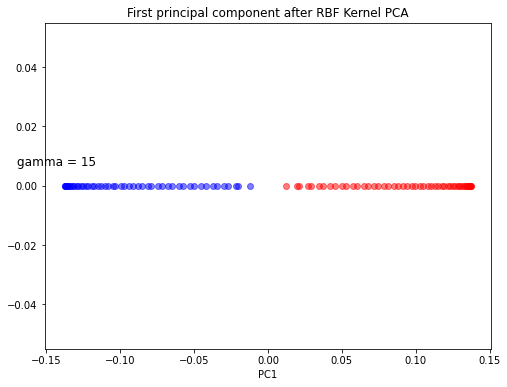

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((50)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((50)), color='blue', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.text(-0.17, 0.007, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.show()

In [ ]:
X_pc[y==0, 0]

array([-0.07455287, -0.13494176, -0.0121587 , -0.05279084, -0.04514474,
       -0.13653254, -0.13715755, -0.07190802, -0.09757123, -0.11322075,
       -0.12935107, -0.13320861, -0.12834211, -0.08130447, -0.07877284,
       -0.13387369, -0.12165175, -0.09971242, -0.13184362, -0.10316483,
       -0.02128409, -0.09390656, -0.11023007, -0.11916726, -0.13699382,
       -0.0498413 , -0.06026745, -0.13100714, -0.05741388, -0.0647807 ,
       -0.11490455, -0.12640181, -0.10516006, -0.13543746, -0.08776328,
       -0.0373761 , -0.0853533 , -0.11764729, -0.13620387, -0.067532  ,
       -0.02692825, -0.0916269 , -0.02948509, -0.01998601, -0.10838756,
       -0.13731155, -0.04213031, -0.12522054, -0.03441585, -0.12300381])

In [ ]:
sq_dists = pdist(X, 'sqeuclidean')
for i in range(101):
  print(sq_dists[i])

0.004109214499327315
0.016419972353507777
0.036881686017869286
0.06541027392194115
0.10188850597866264
0.14616648530795645
0.19806226419516174
0.25736259175322124
0.3238237902163186
0.39717275626408655
0.4771080832617312
0.5633012998045448
0.6553982194773663
0.7530203962825328
0.8557666797556607
0.9632148633789497
1.074923419518329
1.190433313755212
1.3092698911573843
1.4309448267379348
1.5549581320873713
1.6808002099332415
1.8079539481846365
1.9358968448566893
2.06410315514331
2.192046051815363
2.319199790066758
2.4450418679126287
2.569055173262065
2.690730108842615
2.8095666862447874
2.92507658048167
3.03678513662105
3.144233320244339
3.2469796037174667
3.344601780522633
3.4366987001954556
3.5228919167382684
3.6028272437359123
3.676176209783681
3.7426374082467784
3.801937735804838
3.853833514692044
3.8981114940213373
3.9345897260780593
3.9631183139821307
3.983580027646492
3.995890785500673
4.0
1.25
1.185929780019287
1.1221228383154942
1.0588413712986278
0.9963454160904927
0.934891781

In [ ]:
mat_sq_dists = squareform(sq_dists)
print(mat_sq_dists)
K = exp(-15 * mat_sq_dists)

[[0.         0.00410921 0.01641997 ... 1.12212284 1.18592978 1.25      ]
 [0.00410921 0.         0.00410921 ... 1.08262355 1.13827953 1.19414821]
 [0.01641997 0.00410921 0.         ... 1.05965595 1.10724506 1.15496278]
 ...
 [1.12212284 1.08262355 1.05965595 ... 0.         0.00410921 0.01641997]
 [1.18592978 1.13827953 1.10724506 ... 0.00410921 0.         0.00410921]
 [1.25       1.19414821 1.15496278 ... 0.01641997 0.00410921 0.        ]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(K)

[[1.00000000e+00 9.40222981e-01 7.81688008e-01 ... 4.89805491e-08
  1.88086926e-08 7.19413303e-09]
 [9.40222981e-01 1.00000000e+00 9.40222981e-01 ... 8.85805794e-08
  3.84390108e-08 1.66272464e-08]
 [7.81688008e-01 9.40222981e-01 1.00000000e+00 ... 1.25014106e-07
  6.12271001e-08 2.99288857e-08]
 ...
 [4.89805491e-08 8.85805794e-08 1.25014106e-07 ... 1.00000000e+00
  9.40222981e-01 7.81688008e-01]
 [1.88086926e-08 3.84390108e-08 6.12271001e-08 ... 9.40222981e-01
  1.00000000e+00 9.40222981e-01]
 [7.19413303e-09 1.66272464e-08 2.99288857e-08 ... 7.81688008e-01
  9.40222981e-01 1.00000000e+00]]
